In [1]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import re
from scipy import signal
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
plt.rcParams['pdf.fonttype'] = 42

In [2]:
def exponential_fit(t, a, b):
    return b*np.exp(a*t)


In [3]:
promoters = [0, 0.004570526, 0.005059323, 0.015756694, 0.016778947, 0.020553788, 0.024831409, 0.054190103, 0.057782106, 0.091762047, 0.10009079, 0.226661754, 0.517587758, 0.593915896, 2.333139748, 3.146229112]
offset = {"wee1": 0.003795084, "cdc25": 0.061699729295} # wee1: A21x0.152834 T21x0.671065

data_all = pd.read_csv("./_length-for-plot.csv", index_col=0)
colormap = plt.get_cmap("coolwarm")

max_ = data_all.max().max()
min_ = data_all.replace(-1, 10).min().min()
max_dif = max(max_ - 1, 1 - min_)
cmap_max = 1 + max_dif
cmap_min = 1 - max_dif
x = []
y = []
c = []
for i in range(len(promoters)):
    for j in range(len(promoters)):
        if data_all.iloc[i][j] == np.NaN:
            continue
        if data_all.iloc[i][j] == -1:
            continue
        x.append((promoters[j]+offset["cdc25"])/offset["cdc25"]) # endo-のcdc25何倍か
        y.append((promoters[i]+offset["wee1"])/offset["wee1"]) # endo-のwee1の何倍か
        c.append(data_all.iloc[i][j])
#            c.append((data_all.iloc[i][j] - cmap_min) / (2 * max_dif))
#    plt.scatter(x=x, y=y, c=c, cmap=colormap, vmax=1, vmin=0)
x2 = []
y2 = []
c2 = []
for i in range(len(promoters)):
    for j in range(len(promoters)):
        if data_all.iloc[i][j] != -1:
            continue
        x2.append((promoters[j]+offset["cdc25"])/offset["cdc25"]) # endo-のcdc25何倍か
        y2.append((promoters[i]+offset["wee1"])/offset["wee1"]) # endo-のwee1の何倍か
        c2.append(data_all.iloc[i][j])
#            c.append((data_all.iloc[i][j] - cmap_min) / (2 * max_dif))
#    plt.scatter(x=x, y=y, c=c, cmap=colormap, vmax=1, vmin=0)


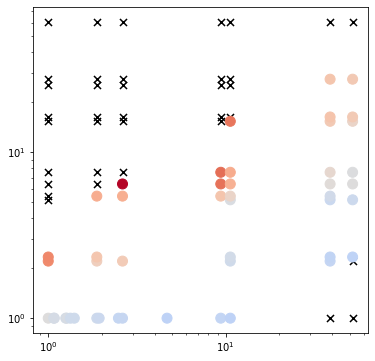

In [4]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x=x2, y=y2, color="black", marker="x", s=50)
plt.scatter(x=x, y=y, c=c, cmap=colormap, vmax=cmap_max, vmin=cmap_min, s=100)
#plt.colorbar()
plt.xscale("log")
plt.yscale("log")
#    plt.xlim(-0.1, 3.5)
#    plt.ylim(-0.005, 0.11)
fig.savefig("./_length-distribution_3.png")
fig.savefig("./_length-distribution_3.pdf", transparent=True)


In [5]:
data_all = pd.read_csv("./_cv-for-plot.csv", index_col=0)
colormap = plt.get_cmap("coolwarm")

max_ = data_all.max().max()
min_ = data_all.replace(-1, 10).min().min()
max_dif = max(max_ - 1, 1 - min_)
cmap_max = 1 + max_dif
cmap_min = 1 - max_dif
x3 = []
y3 = []
c3 = []
for i in range(len(promoters)):
    for j in range(len(promoters)):
        if data_all.iloc[i][j] == np.NaN:
            continue
        if data_all.iloc[i][j] == -1:
            continue
        x3.append((promoters[j]+offset["cdc25"])/offset["cdc25"]) # endo-のcdc25何倍か
        y3.append((promoters[i]+offset["wee1"])/offset["wee1"]) # endo-のwee1の何倍か
        c3.append(data_all.iloc[i][j])
#            c.append((data_all.iloc[i][j] - cmap_min) / (2 * max_dif))
#    plt.scatter(x=x, y=y, c=c, cmap=colormap, vmax=1, vmin=0)
x4 = []
y4 = []
c4 = []
for i in range(len(promoters)):
    for j in range(len(promoters)):
        if data_all.iloc[i][j] != -1:
            continue
        x4.append((promoters[j]+offset["cdc25"])/offset["cdc25"]) # endo-のcdc25何倍か
        y4.append((promoters[i]+offset["wee1"])/offset["wee1"]) # endo-のwee1の何倍か
        c4.append(data_all.iloc[i][j])
#            c.append((data_all.iloc[i][j] - cmap_min) / (2 * max_dif))
#    plt.scatter(x=x, y=y, c=c, cmap=colormap, vmax=1, vmin=0)


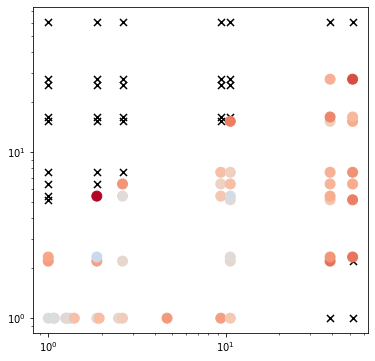

In [6]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x=x4, y=y4, color="black", marker="x", s=50)
plt.scatter(x=x3, y=y3, c=c3, cmap=colormap, vmax=cmap_max, vmin=cmap_min, s=100)
#plt.colorbar()
plt.xscale("log")
plt.yscale("log")
#    plt.xlim(-0.1, 3.5)
#    plt.ylim(-0.005, 0.11)
fig.savefig("./_cv-distribution_3.png")
fig.savefig("./_cv-distribution_3.pdf", transparent=True)
